In [1]:
from era5 import arco_era5 as era5

# edit dataset source here
ds = era5.connect("gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2")
ds

Dataset size: 486.03 TiBs


<xarray.Dataset>
Dimensions:                                           (time: 552264,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 37)
Coordinates:
  * latitude                                          (latitude) float32 90.0...
  * level                                             (level) int64 1 2 ... 1000
  * longitude                                         (longitude) float32 0.0...
  * time                                              (time) datetime64[ns] 1...
Data variables: (12/31)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    geopotential                                      (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 37, 721, 1440), meta=np.ndarray>
    ...                                                ...
    total_precipitation                               (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    type_of_high_vegetation                           (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    type_of_low_vegetation                            (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    u_component_of_wind                               (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 37, 721, 1440), meta=np.ndarray>
    v_component_of_wind                               (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 37, 721, 1440), meta=np.ndarray>
    vertical_velocity                                 (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 37, 721, 1440), meta=np.ndarray>

In [165]:
variable = "high_vegetation_cover"  # edit variable here

ds = era5.connect("gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2",
                  (variable,))
data = ds
ds

Dataset size: 3.97 MiBs


<xarray.Dataset>
Dimensions:                (latitude: 721, longitude: 1440)
Coordinates:
  * latitude               (latitude) float32 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude              (longitude) float32 0.0 0.25 0.5 ... 359.5 359.8
Data variables:
    high_vegetation_cover  (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>

In [ ]:
# Uncomment to select data at a time-averaged value
# data = era5.select_tavg_slice(ds, 2012, 2022, "06-01 00:00")

# Uncomment to select data at a vertical slice or time coordinate
# data = era5.select_vertical_slice(data, 1000, 1000)

# data = era5.compute_tavg(data)

data

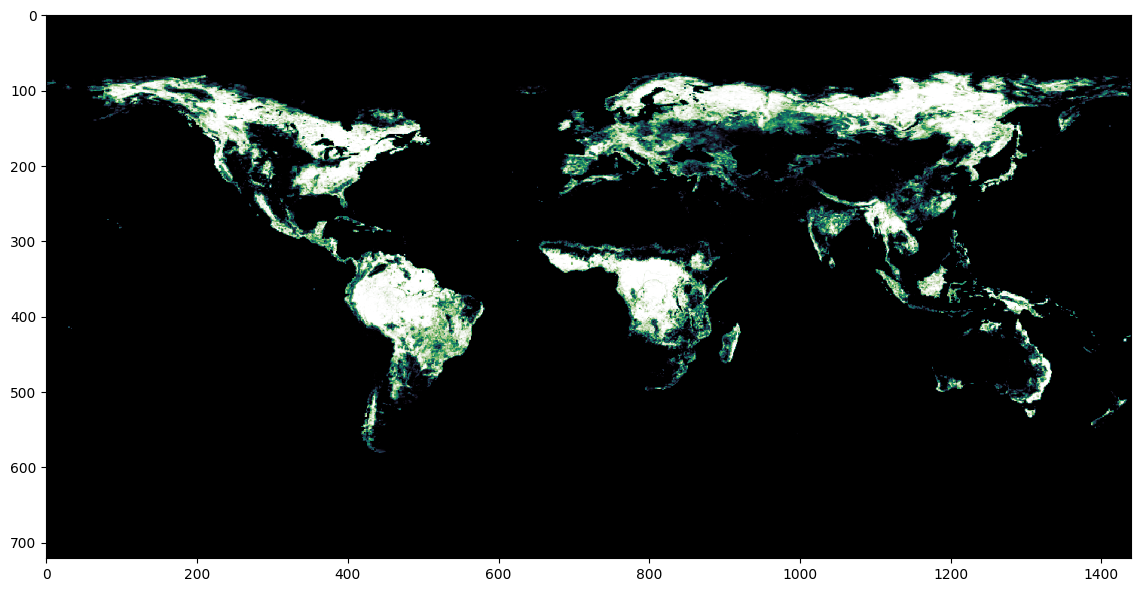

In [166]:
import matplotlib.pyplot as plt
import cmasher as cmr

import numpy as np

img = data[variable].values
img = np.roll(img, 1440 // 2, axis=1)

plt.figure(figsize=(14, 10))
plt.imshow(np.log10(img + 1), cmap=cmr.swamp)
plt.show()